# Libraries
---

In [1]:
# Data handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load Model
---

In [2]:
# Load model
with open('model.pkl', 'rb') as model:
    model = pickle.load(model)

# Load data
with open('data_test.pkl', 'rb') as data:
    test = pickle.load(data)

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2022-06-20 to 2022-06-29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sales_sum  10 non-null     float64
 1   qty_sum    10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 240.0 bytes


In [4]:
test.index

DatetimeIndex(['2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-25', '2022-06-26', '2022-06-27',
               '2022-06-28', '2022-06-29'],
              dtype='datetime64[ns]', name='date', freq=None)

In [5]:
test = test.reset_index()

In [6]:
test['date']

0   2022-06-20
1   2022-06-21
2   2022-06-22
3   2022-06-23
4   2022-06-24
5   2022-06-25
6   2022-06-26
7   2022-06-27
8   2022-06-28
9   2022-06-29
Name: date, dtype: datetime64[ns]

In [7]:
test

,date,sales_sum,qty_sum
0,2022-06-20,487488.0,750
1,2022-06-21,501999.0,778
2,2022-06-22,514603.0,814
3,2022-06-23,407495.0,635
4,2022-06-24,423907.0,655
5,2022-06-25,458603.0,681
6,2022-06-26,511759.0,759
7,2022-06-27,447699.0,660
8,2022-06-28,444275.0,669
9,2022-06-29,115595.0,173


In [8]:
# Forecast 
forecast_days = 7
future_qty_sum = [718, 902, 678, 583, 687, 763, 790]

In [9]:
len(future_exog_vars) == forecast_days  # Harus True


NameError: name 'future_exog_vars' is not defined

In [ ]:
print(future_exog_vars.shape)          # Harus (7, 1)
print(future_exog_vars.columns)        # Harus sama dengan exog_train


(7, 1)
Index(['qty_sum'], dtype='object')


In [ ]:
print(future_exog_vars)
print(future_exog_vars.shape)
# untuk melihat kolom yang diharapkan


      qty_sum
0  714.285714
1  714.285714
2  714.285714
3  714.285714
4  714.285714
5  714.285714
6  714.285714
(7, 1)


In [11]:
# Create DataFrame for future exogenous variables
future_exog_vars = pd.DataFrame(future_qty_sum, columns=['qty_sum'])

# Forecast the future units sold
forecast = model.get_forecast(steps=forecast_days, exog=future_exog_vars)

# Ensure test.index[-1] is a Timestamp and then add Timedelta for weekly forecast
last_date = test['date'].iloc[-1]  # Last date from the 'date' column
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), 
                               periods=forecast_days, freq='D')

In [12]:
print(future_exog_vars.shape) 

(7, 1)


ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

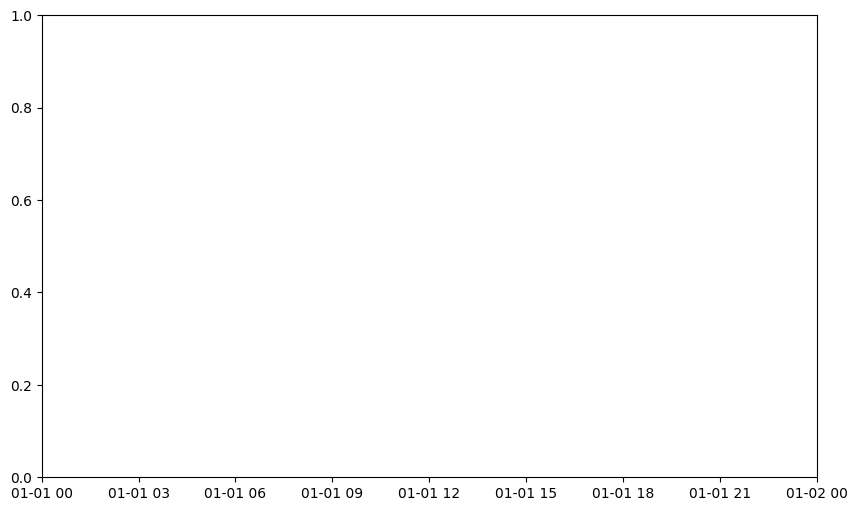

In [13]:
# Create a plot
plt.figure(figsize=(10, 6))

# Plot forecasted values for the next 4 weeks
plt.plot(forecast_index, forecast, label='Forecasted Total Sales', color='red', linestyle='--')

# Labels and title
plt.title('Forecast of Total Sales Over the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Buat exog array untuk 7 hari ke depan (bisa juga input manual)
exog_future = np.array([future_qty_sum / forecast_days] * forecast_days, columns=['qty_sum']).reshape(-1, 1)

# Forecast menggunakan model SARIMAX yang sudah di-fit
forecast_result = model.get_forecast(steps=forecast_days, exog=exog_future)

# Ambil hasil prediksi
predicted_sales = forecast_result.predicted_mean
predicted_conf_int = forecast_result.conf_int()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Buat tanggal untuk prediksi ke depan
last_date = test['date'].max()  # misalnya test adalah data originalmu
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=len(predicted_sales))

# 2. Plot hasil prediksi
plt.figure(figsize=(12,6))

# Plot data historis terakhir
plt.plot(test['date'][-1:], test['sales'][-1:], label='Data Aktual (1 hari terakhir)', color='blue')

# Plot prediksi
plt.plot(future_dates, predicted_sales, label='Prediksi Inference', color='green')

# Plot confidence interval
plt.fill_between(future_dates,
                 predicted_conf_int.iloc[:, 0],
                 predicted_conf_int.iloc[:, 1],
                 color='lightgreen',
                 alpha=0.4,
                 label='Confidence Interval')

# Styling
plt.title('Forecasting Sales berdasarkan User Input Exogenous')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'date'